<a href="https://colab.research.google.com/github/shravya1125/Plant-Disease-Detection/blob/main/plant_disease_detection3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf

# Use tf.keras.preprocessing.image for ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
len(os.listdir("/content/drive/MyDrive/dataset/train"))


5

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range=0.5,
    shear_range=0.3,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [ ]:
train = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/dataset/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'  # adjust accordingly based on your problem (e.g., binary or categorical)
)

val = val_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/dataset/valid",  # Update with your validation directory
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'  # adjust accordingly based on your problem (e.g., binary or categorical)
)

Found 3783 images belonging to 5 classes.
Found 844 images belonging to 5 classes.


In [ ]:
t_img, label = next(train)

In [ ]:
def plotImage(img_arr,label):
    for im,l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()

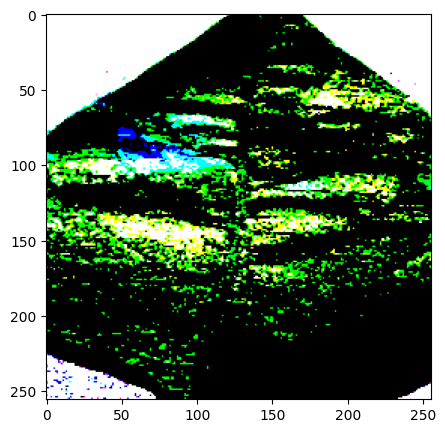

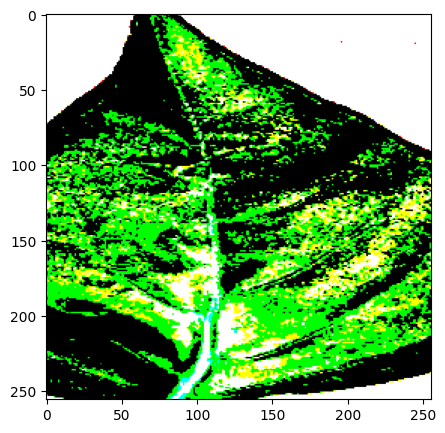

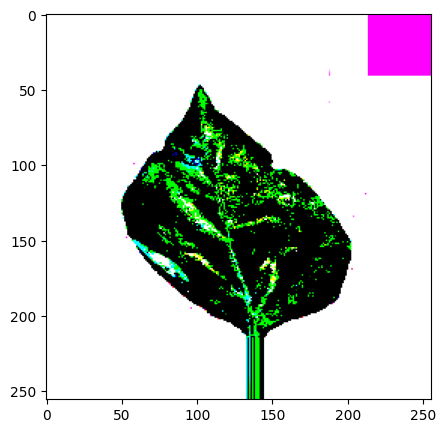

In [ ]:
plotImage(t_img[:3],label[:3])

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19  # Corrected import statement
import keras


In [ ]:
base_model= VGG19(input_shape=(256,256,3),include_top=False)
for layer in base_model.layers:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
X= Flatten()(base_model.output)
X= Dense(units= 5,activation ='softmax')(X)
#creating our model
model= Model(base_model.input,X)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,188,229 (77.01 MB)

 Trainable params: 163,845 (640.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es= EarlyStopping(monitor= 'val_accuracy',min_delta=0.01,patience=5,verbose=1)
#model check point
# Removed patience as it's not a valid argument for ModelCheckpoint
# ModelCheckpoint saves the best model based on the monitored metric
# Changed filepath to end with .keras to save the entire model
mc=ModelCheckpoint(filepath="best_model.keras",monitor= 'val_accuracy',verbose=1,save_best_only= True)
cb=[es,mc]

In [ ]:
import math
dataset = "/content/drive/MyDrive/dataset/train"

batch_size = 32  # Define your batch size

steps_per_epoch = math.ceil(len(dataset) / batch_size)
print(f"Steps per epoch: {steps_per_epoch}")

Steps per epoch: 2


In [ ]:
validation_dataset = "/content/drive/MyDrive/dataset/valid"
batch_size = 32
validation_steps = math.ceil(len(validation_dataset) / batch_size)

# Print validation_steps
print(f"Validation steps: {validation_steps}")

Validation steps: 2


In [ ]:
# Assuming train and val generators are already defined
# steps_per_epoch and validation_steps calculated based on your dataset size and batch size

his = model.fit(
    train,
    steps_per_epoch=2,
    epochs=50,
    verbose=1,
    callbacks=cb,
    validation_data=val,
    validation_steps=2
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9219 - loss: 2.1176  
Epoch 1: val_accuracy improved from -inf to 0.96875, saving model to best_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 8s/step - accuracy: 0.9062 - loss: 2.7013 - val_accuracy: 0.9688 - val_loss: 2.4751
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7969 - loss: 4.4538
Epoch 2: val_accuracy did not improve from 0.96875
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.7917 - loss: 4.5485 - val_accuracy: 0.7500 - val_loss: 7.3089
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8359 - loss: 5.7155
Epoch 3: val_accuracy did not improve from 0.96875
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - accuracy: 0.8333 - loss: 5.5096 - val_accuracy: 0.8125 - val_loss: 3.3417
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7422 - loss: 6.0234
Epoch 4: val_accuracy did not improve from 0.96875
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.7604 - loss: 5.4251 - val_accuracy: 0.8750 - va

In [ ]:
keys_list = list(his.history.keys())
print(keys_list)

['accuracy', 'loss', 'val_accuracy', 'val_loss']


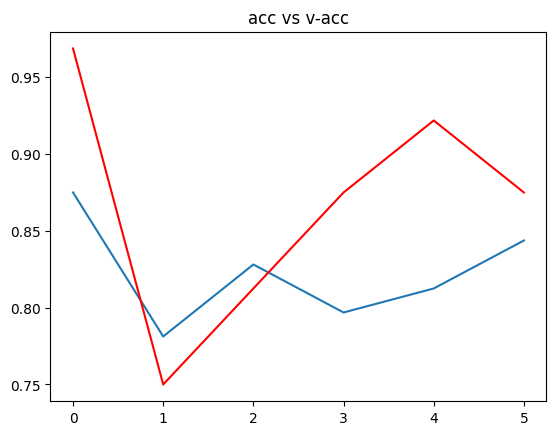

In [ ]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

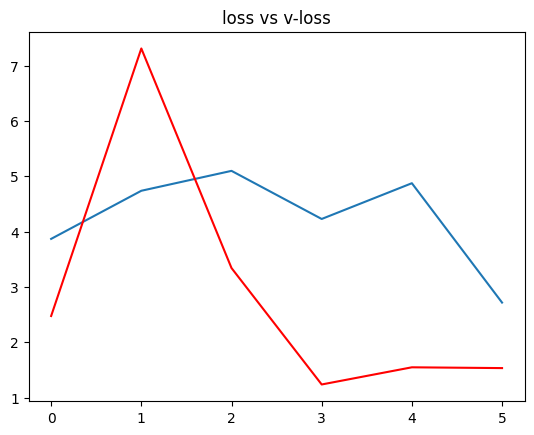

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
import os
print(os.listdir())  # Lists files in the current working directory


['.config', '.gradio', 'drive', 'best_model.keras', 'sample_data']


In [ ]:
#load best model
from keras.models import load_model
# Specify the path to the saved model file
model_path = "best_model.keras"
# Load the model
model = load_model(model_path)

In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
    img = load_img(path,target_size=(256,256))
    i=img_to_array(img)
    im=preprocess_input(i)
    img= np.expand_dims(im,axis=0)
    #print(img.shape)
    pred = np.argmax(model.predict(img))  #argmax highest probability
    #print(pred)
    print(f"the image belongs to {ref[pred]}")

In [ ]:
path = "/content/drive/MyDrive/dataset/valid/Pepper__bell___Bacterial_spot/0fcbdf76-fcc4-4271-986a-9466a784d404___JR_B.Spot 3374.JPG"
prediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
the image belongs to Pepper__bell___Bacterial_spot


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

Overwriting app.py


In [ ]:
# Load model
model_path = "best_model.keras"
model = load_model(model_path)
class_labels = ["Potato___Late_blight", "Potato___healthy", "Potato___Early_blight", "Pepper__bell___healthy", "Pepper__bell___Bacterial_spot"]


In [ ]:
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np

# Function to preprocess the image
def preprocess_image(image_file):
    # Resize image to the target size expected by the model
    image = load_img(image_file, target_size=(256, 256))  # Ensure 256x256 resolution
    image_array = img_to_array(image)  # Convert image to numpy array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Normalize pixel values
    return image_array


In [ ]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
#from tensorflow.keras.preprocessing.image import img_to_array # Already imported in preprocess_image
from PIL import Image
import numpy as np

# Load model
model_path = "best_model.keras"
model = load_model(model_path)
class_labels = ["Potato___Late_blight", "Potato___healthy", "Potato___Early_blight", "Pepper__bell___healthy", "Pepper__bell___Bacterial_spot"]

from tensorflow.keras.utils import img_to_array, load_img
#import numpy as np  # Already imported above

# Function to preprocess the image
def preprocess_image(image_file):
    # Resize image to the target size expected by the model
    image = load_img(image_file, target_size=(256, 256))  # Ensure 256x256 resolution
    image_array = img_to_array(image)  # Convert image to numpy array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Normalize pixel values
    return image_array

# Streamlit app
st.title("Plant Disease Classification")
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"]) # Add file uploader widget

# Assuming `uploaded_file` is the image uploaded through Streamlit
if uploaded_file is not None:
    # Preprocess the uploaded image
    image = Image.open(uploaded_file) # Open the image using PIL
    st.image(image, caption='Uploaded Image.', use_column_width=True) # Display the uploaded image
    image_array = preprocess_image(uploaded_file)

    # Predict using the model
    predictions = model.predict(image_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Display the prediction
    st.write(f"Prediction: **{predicted_class_label}**")

Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st # Import the Streamlit library
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

# Load model
model_path = "best_model.keras"
model = load_model(model_path)
class_labels = ["Potato___Late_blight", "Potato___healthy", "Potato___Early_blight", "Pepper__bell___healthy", "Pepper__bell___Bacterial_spot"]

# Function for preprocessing the image
def preprocess_image(image):
    image = image.resize((224, 224))  # Resize image as per model input
    image = img_to_array(image) / 255.0  # Normalize image
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Streamlit UI elements
st.title("Plant Disease Detection") # Now 'st' is defined and can be used
st.write("Upload an image of a plant leaf to detect its health or disease.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display the uploaded image
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
    image = Image.open(uploaded_file)
    image_array = preprocess_image(image)
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class] * 100
    st.write(f"Prediction: {class_labels[predicted_class]} ({confidence:.2f}% confidence)")

Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
import subprocess

# Start the Streamlit app in the background
subprocess.Popen(["streamlit", "run", "app.py"])  # Replace "app.py" with your Streamlit script


<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>

In [ ]:
!lsof -i :8501

COMMAND     PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
streamlit 30221 root    6u  IPv4 856220      0t0  TCP *:8501 (LISTEN)
streamlit 30221 root    7u  IPv6 856221      0t0  TCP *:8501 (LISTEN)


In [ ]:
from pyngrok import ngrok

# Replace 'YOUR_AUTHTOKEN' with your actual ngrok authtoken from the ngrok dashboard
ngrok.set_auth_token("2pM7OUuej2BMJQ300AFdea9aJKo_78hu4Shg1FKA3XKwv4iDA")


In [ ]:
# Open a tunnel to the streamlit app
# Changed: Specifying the port within the 'addr' field
public_url = ngrok.connect(addr='localhost:8501')
print(f"Streamlit app is live at {public_url}")

Streamlit app is live at NgrokTunnel: "https://4b0e-34-105-116-255.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pip install gradio # Install the gradio library

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

In [ ]:
# Load the trained model
model_path = "best_model.keras"  # Path to your saved model
model = load_model(model_path)
# Class labels for diseases
class_labels = ["Potato___Late_blight", "Potato___healthy", "Potato___Early_blight", "Pepper__bell___healthy" , "Pepper__bell___Bacterial_spot"]

In [ ]:
# Image preprocessing function
def preprocess_image(image):
    """
    Preprocess the uploaded image to match the input shape of the model.
    """
    img = image.resize((224, 224))  # Resize image to 224x224 (or model's input size)
    img = img_to_array(img)  # Convert image to numpy array
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [ ]:
# Prediction function
def predict(image):
    """
    Take an uploaded image, preprocess it, and predict the plant disease.
    """
    processed_image = preprocess_image(image)
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions[0])  # Get index of highest probability
    confidence = predictions[0][predicted_class] * 100  # Get confidence in percentage
    return f"{class_labels[predicted_class]} ({confidence:.2f}% confidence)"

In [ ]:
# Gradio Interface
app = gr.Interface(
    fn=predict,  # Prediction function
    inputs=gr.Image(type="pil"),  # Input widget for image upload
    outputs=gr.Textbox(label="Prediction"),  # Output widget for displaying the result
    title="Plant Disease Detection",  # App title
    description="Upload an image of a plant leaf to detect its health status or disease.",  # App description
    live=True,  # Real-time prediction
)

In [ ]:
# Launch the app
app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5f65b7655dd6e5b00c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
